In [1]:
using Plots

In [226]:
n,a,p=1000,3,0.33
data = randn(n) .- a .+ 2*a .* (rand(n) .< p);

function P(x,t,p=p,q=1-p, a=a)
    m = exp(-t)*a
    ret = p*exp(-(x-m)^2/2) + q*exp(-(x+m)^2/2)
    return ret / sqrt(2*pi)
end 

function S(x,t,p=p, q=1-p, a=a)
    m = exp(-t)*a
    d = (p * exp(-(x.-m).^2/2).*(x.-m) .+ q * exp(-(x.+m).^2/2).*(x.+m)) ./ sqrt(2*pi)
    return -d./P.(x,t)
end

function V(x,t,p=p,q=1-p,a=a)
    return S.(x,t,p,q,a) .+ x
end

V (generic function with 4 methods)

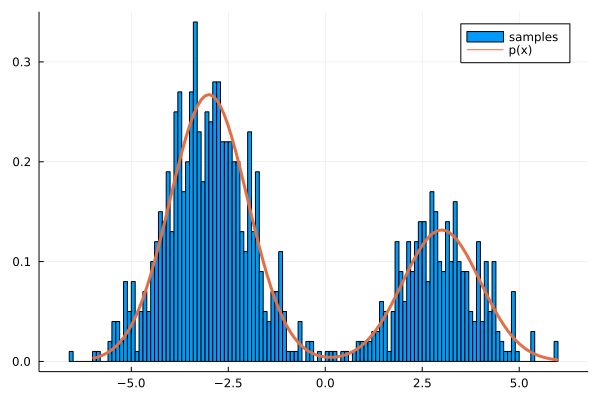

In [227]:
histogram(data, nbins=200, norm=true,label="samples")
u = -6:0.1:6
plot!(u, P.(u,0), lw=3, label = "p(x)")


In [134]:
function sde(data, δ=0.01, T=3)
    n,N = size(data)[1],Int(floor(T/δ))
    ret = zeros(n,N)
    ret[:,1] = data
    for t in 1:N-1
        ret[:,t+1] = (1-δ)*ret[:,t] + √(2δ)*randn(n)
    end
    return ret, range(0,3,length=N)
end

function ode(data, δ=0.01, T=3)
    n,N = size(data)[1],Int(floor(T/δ))
    ret = zeros(n,N)
    ret[:,1] = data
    for t in 1:N-1
        ret[:,t+1] = ret[:,t] .- δ * V.(ret[:,t],t*δ)
    end
    return ret, range(0,3,length=N)
end

ode (generic function with 3 methods)

In [187]:
ou,times = sde(data)
te,times = ode(data)


([-2.8136488623350715 -2.7839473739693235 … -0.8436957938645246 -0.8440322164431233; -5.537640145946856 -5.507938650934381 … -2.8974432062119373 -2.897318243610036; … ; -2.1274642779461646 -2.097763174541031 … -0.5799755247784724 -0.5803684526805498; -2.9518509917177997 -2.922149499629939 … -0.9138616596140535 -0.9141828716382497], 0.0:0.010033444816053512:3.0)

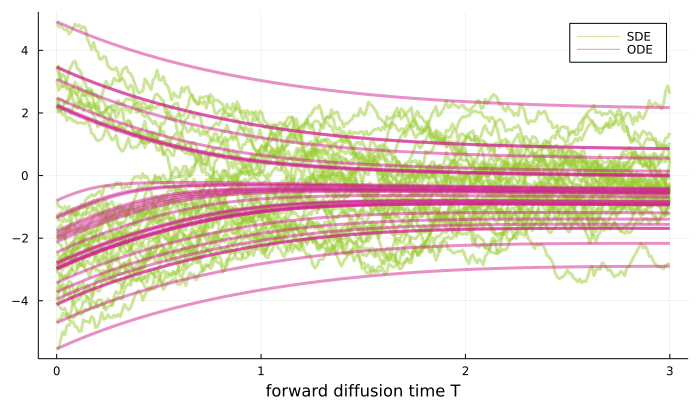

In [237]:

N=30
pl1=plot(times, transpose(ou[1:1,:]), color=:yellowgreen, lw=3, alpha=0.5,label="SDE")
plot!(times, transpose(te[1:1,:]), color=:violetred, lw=3, alpha=0.5,label="ODE")

plot!(times, transpose(ou[2:N,:]), color=:yellowgreen, lw=3, alpha=0.5,label=:none)
plot!(times, transpose(te[1:N,:]), color=:violetred, lw=3, alpha=0.5, label=:none)
plot!(size=(700,400))
xlabel!("forward diffusion time T")
#plot!(3.5 .+P.(u,3),u, fill=:gray,lw=3,color=:gray, legend=nothing)
#plot!(-0.5 .+ P.(u,0),u, lw=3,color=:gray, legend=nothing)

#plot!(p1,p2,p3,layout=(1,3))

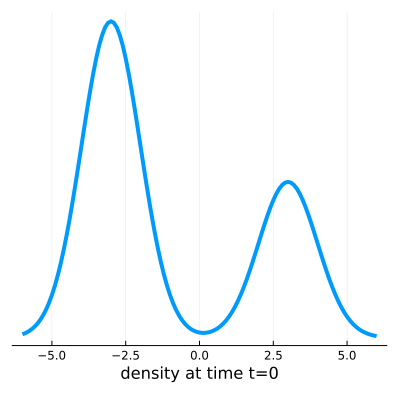

In [243]:
p1=plot(u,P.(u,0), legend=nothing, lw=4, xlabel="density at time t=0", size=(400,400), yaxis=([],false))

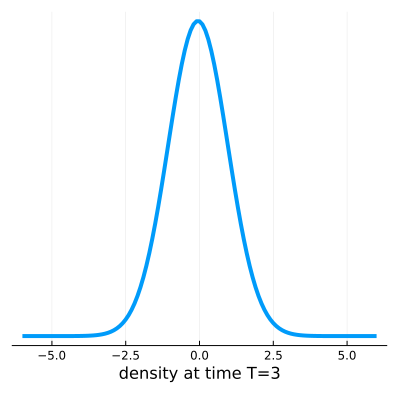

In [244]:
p3=plot(u,P.(u,3), legend=nothing, lw=4, xlabel="density at time T=3", size=(400,400), yaxis=([],false))

In [269]:
l=@layout [a{0.2w, 0.93h} b{0.6w} c{0.2w}]
fp = plot(p1,pl1,p3, layout=l, size=(1000,400))
savefig(fp, "diff.png")

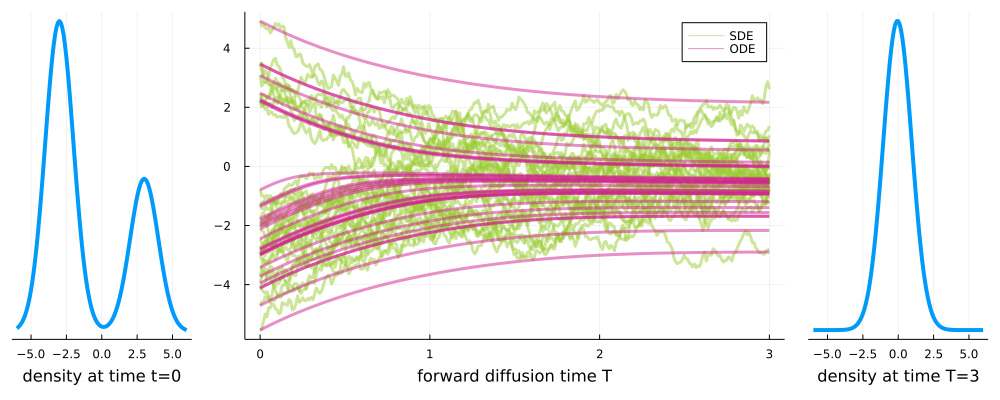

In [270]:
fp